In [2]:
## importing the data
import pandas as pd

In [15]:
file_path=  r'c:\Users\senvo\Downloads\Nat_Gas.csv'

In [18]:
##Reading the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [19]:


    # Display the first few rows of the DataFrame
    print(df.head())



      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9


In [26]:
## Visualising data to identify trends or any patterns
import matplotlib.pyplot as plt 

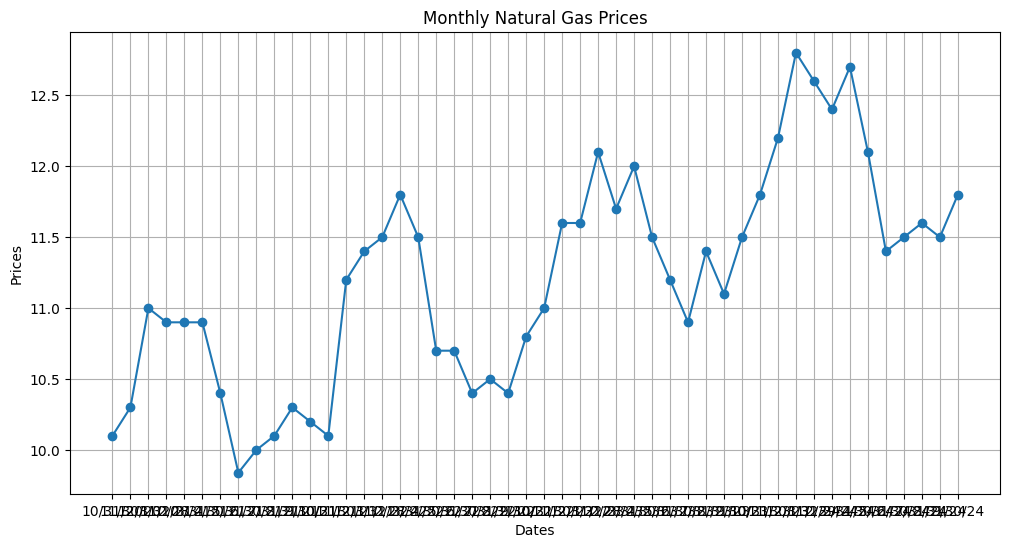

In [27]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['Dates'], df['Prices'], marker='o')
plt.title('Monthly Natural Gas Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.show()

In [46]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np
# Convert date to ordinal for regression
df['Date_ordinal'] = df['Date'].apply(lambda x: x.toordinal())

In [49]:
## data for regression
X = df['Date_ordinal'].values.reshape(-1, 1)
y = df['Prices'].values

In [50]:
##Fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [52]:
 ##Generate future dates for extrapolation
future_dates = pd.date_range(start=df['Date'].max(), periods=13, freq='ME')
future_dates_ordinal = future_dates.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)


In [53]:
# Predict future prices
future_prices = model.predict(future_dates_ordinal)

In [64]:
# Combine future dates and prices into a DataFrame
future_df = pd.DataFrame({'Date': future_dates, 'Prices': future_prices})

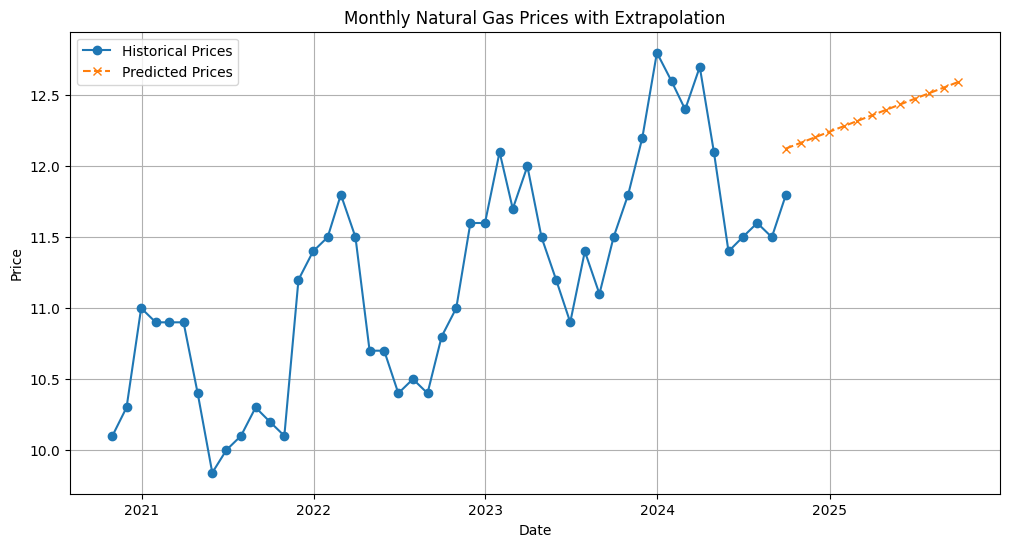

In [65]:
# Plot the historical and predicted data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Prices'], marker='o', label='Historical Prices')
plt.plot(future_df['Date'], future_df['Prices'], marker='x', linestyle='--', label='Predicted Prices')
plt.title('Monthly Natural Gas Prices with Extrapolation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
def estimate_price(date_str):
    # Convert input date to datetime
    input_date = pd.to_datetime(date_str)
    
    # Convert to ordinal for prediction
    input_date_ordinal = input_date.toordinal()
    
    # Predict the price using the model
    predicted_price = model.predict([[input_date_ordinal]])
    
    return predicted_price[0]

In [74]:
### predicting future price on 2024-12-31
date_str = '2024-12-31'
estimated_price = estimate_price(date_str)
print(f"Estimated price for {date_str} is: {estimated_price:.2f}") 

Estimated price for 2024-12-31 is: 12.24
